In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple

In [3]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

In [3]:
#bin_value1 = [1076025, 1076026, 1076027, 1076028, 1076029, 1076030, 1076031, 1076032, 1076033, 1076036]
#bin_value2 = [224037+1900000, 224038+1900000, 224039+1900000, 224040+1900000, 224041+1900000, 224042+1900000]
bin = [281320 + 1200000, 281322 + 1200000, 281323 + 1200000, 281324 + 1200000, 281325 + 1200000, 281326 + 1200000, 281327 + 1200000, 281328 + 1200000, 281329 + 1200000, 281330 + 1200000]

/opt/miniconda3/envs/projectespana/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


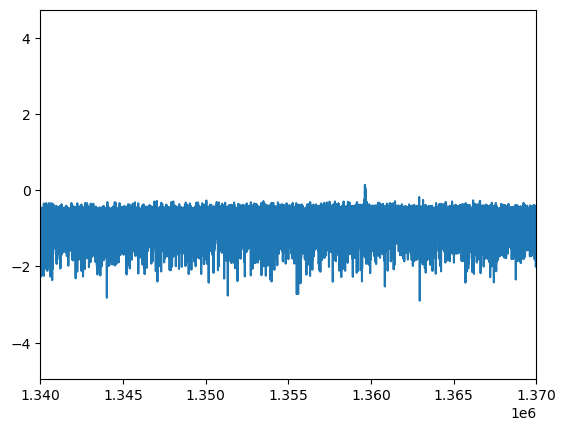

/opt/miniconda3/envs/projectespana/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


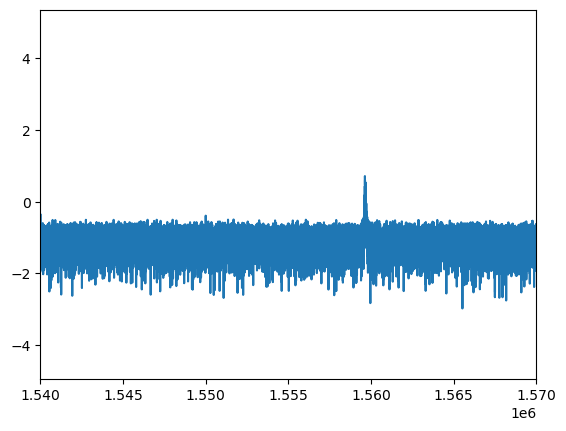

/opt/miniconda3/envs/projectespana/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


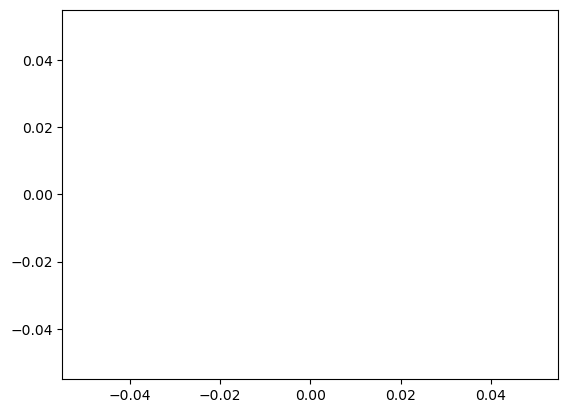

(array([], dtype=int64),)


In [7]:
examplefile = "/home/jshenoy2/ProjectEspana/old_pcb_pork_lifted/old_pcb_pork_lifted/(90, 90)_a"
signal = read_complex_binary2(examplefile)
examplefile = "/home/jshenoy2/ProjectEspana/old_pcb_pork_lifted/old_pcb_pork_lifted/(90, 90)_b"
signal2 = read_complex_binary2(examplefile)

np.fft.fftshift(np.fft.fft(signal))
np.fft.fftshift(np.fft.fft(signal2))
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))
transformed_fft_sig2 = np.log10(np.fft.fftshift(np.fft.fft(signal2)))
plt.plot(transformed_fft_sig)
plt.xlim([1340000,1370000])
plt.show()
plt.plot(transformed_fft_sig2)
plt.xlim([1540000,1570000])
plt.show()
indices_low = np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4))
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))[12500000:17000000]
plt.plot(transformed_fft_sig)
plt.show()
print(np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4)))
#low_value = transformed_fft_sig[bin_value1]
#high_value = transformed_fft_sig[bin_value2]


4 Channel Matrix Plot

In [23]:
file_path = "/home/jshenoy2/ProjectEspana/4chan/"
channel1_mat  = np.zeros((10, 10))
channel2_mat  = np.zeros((10, 10))
channel3_mat  = np.zeros((10, 10))
channel4_mat  = np.zeros((10, 10))

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    peak1 = np.max(transformed_fft_sig[1340000:1370000])
    peak2 = np.max(transformed_fft_sig[1540000:1570000])
    if channel_value == "a":
        channel1_mat[x][y] = peak1
        channel2_mat[x][y] = peak2
    elif channel_value == "b":
        channel3_mat[x][y] = peak1
        channel4_mat[x][y] = peak2
print("DONE Processing")


['(10, 0)', 'b']
['(70, 30)', 'a']
['(10, 40)', 'b']
['(0, 30)', 'a']
['(40, 70)', 'a']
['(70, 90)', 'a']
['(30, 70)', 'a']
['(30, 80)', 'b']
['(60, 30)', 'b']
['(20, 70)', 'a']
['(90, 0)', 'a']
['(60, 10)', 'b']
['(80, 20)', 'a']
['(10, 60)', 'a']
['(70, 0)', 'b']
['(40, 40)', 'a']
['(50, 40)', 'a']
['(20, 80)', 'b']
['(50, 60)', 'a']
['(50, 90)', 'b']
['(70, 90)', 'b']
['(0, 10)', 'b']
['(0, 80)', 'b']
['(20, 60)', 'a']
['(60, 20)', 'a']
['(90, 70)', 'a']
['(40, 60)', 'a']
['(50, 30)', 'a']
['(20, 50)', 'b']
['(80, 80)', 'a']
['(60, 20)', 'b']
['(0, 80)', 'a']
['(70, 70)', 'a']
['(50, 0)', 'b']
['(90, 60)', 'a']
['(30, 90)', 'a']
['(40, 50)', 'b']
['(20, 80)', 'a']
['(80, 0)', 'a']
['(80, 20)', 'b']
['(30, 50)', 'a']
['(40, 80)', 'b']
['(40, 90)', 'a']
['(20, 50)', 'a']
['(20, 30)', 'b']
['(40, 30)', 'b']
['(30, 0)', 'b']
['(60, 80)', 'b']
['(20, 40)', 'b']
['(30, 80)', 'a']
['(90, 80)', 'a']
['(60, 60)', 'b']
['(0, 90)', 'b']
['(70, 60)', 'a']
['(30, 50)', 'b']
['(90, 80)', 'b']
['(

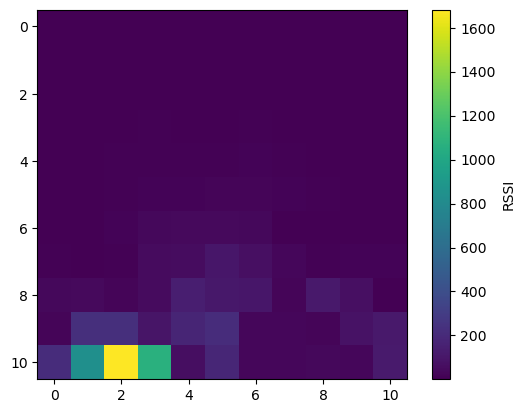

In [7]:
file_path = "/home/jshenoy2/ProjectEspana/newpcb/"
matrix  = np.zeros((11, 11))
for files in glob.glob(file_path+"*"):
    splitty = files.split("/")[-1]
    tup_split = make_tuple(splitty)
    x = int(tup_split[0]/15)
    y = int(tup_split[1]/15)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal)))
    #low_value = transformed_fft_sig[bin_value1]
    high_value = transformed_fft_sig[5759000:5759200]
    high_value = np.max(high_value)
    matrix[x][y] = high_value

plt.imshow(matrix)
plt.colorbar(label="RSSI", orientation="vertical")



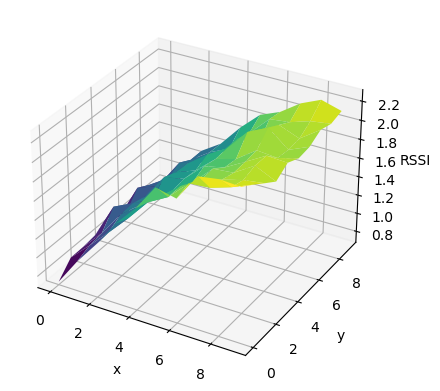

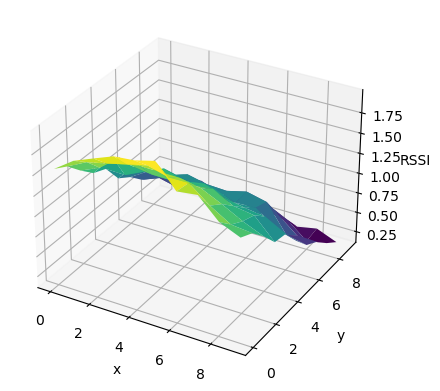

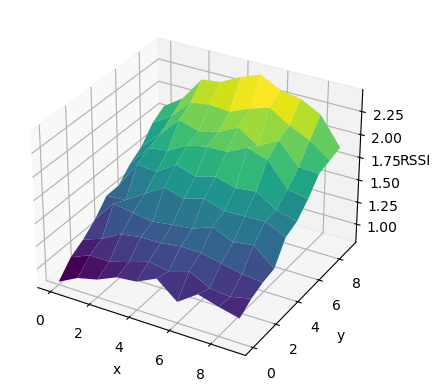

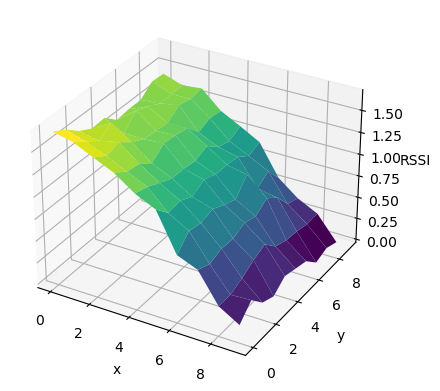

In [24]:
plot_field(np.log10(channel1_mat))
plot_field(np.log10(channel2_mat))
plot_field(np.log10(channel3_mat))
plot_field(np.log10(channel4_mat))

Mesh Plot

In [18]:
def plot_field(matrix):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = np.arange(0,10,1)
    y = np.arange(0,10,1)
    X, Y = np.meshgrid(x, y)
    Z = matrix
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('RSSI');
    plt.pause(1)
    plt.close(fig)


In [23]:
import matplotlib
matplotlib.use('Agg')

Plot Simulation


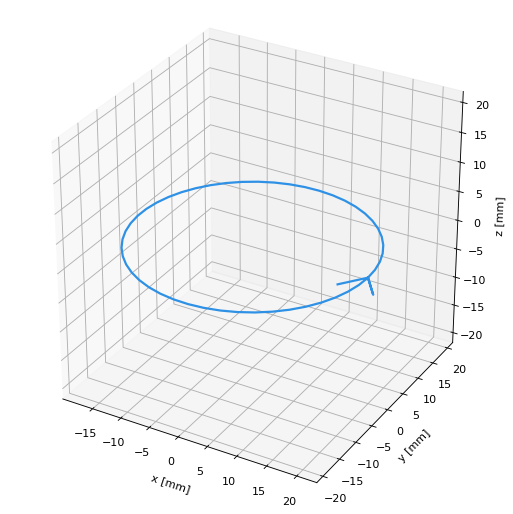

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import magpylib as mp
from scipy.optimize import curve_fit

current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))
#np.save('results/B.npy',B)


def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
    print(x)
    x,y = x
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((15*x+c2,c3,c1 - 15*y))[2]
    B2=current_loop.getB((15*x+c5,c6,c4 - 15*y))[2]
    return np.abs(B1*B2)*10**k


In [19]:


g = np.vectorize(get_signal_strength)


In [21]:
xdata,ydata=[],[]
for i in range(10):
    for j in range(10):
            xdata.append((i,j))
            ydata.append(Z[i][j])
xdata=np.array(xdata).T
def get_signal_strength_wrapper(xdata,c1,c2,c3,c4,c5,c6,k):
    xs,ys=xdata
    results=[]
    for x,y in zip(xs,ys):
        #print(x,y)
        results.append(get_signal_strength((x,y),c1,c2,c3,c4,c5,c6,k))
    return np.array(results)
ogbound = ([250,-150,-100,250,-150,-100,10],[350,-100,100,350,-100,100,15])
popt,pcov=curve_fit(get_signal_strength_wrapper,xdata,ydata,p0=[300,-120,20,300,-120,20,7],bounds = ([1,-300,-500,1,-300,-100,5],[300,-20,500,700,-20,500,15])) # Params: z, dx1, dy1, dz1, dx2, dy2, dz2, r, k
print(popt)

KeyboardInterrupt: 

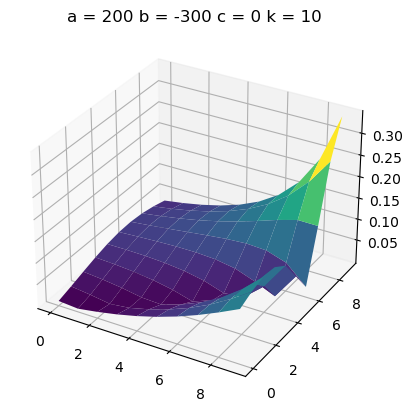

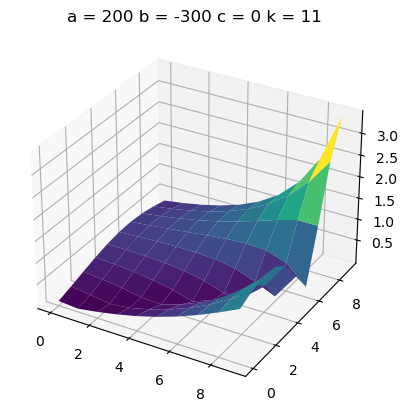

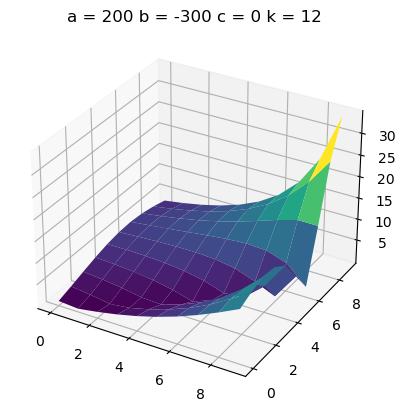

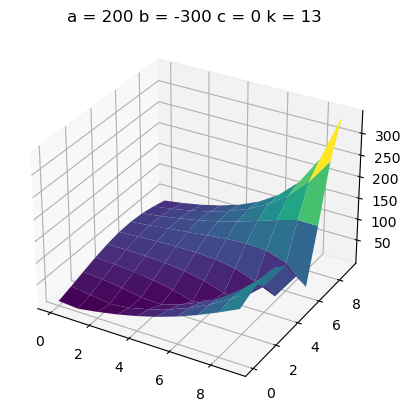

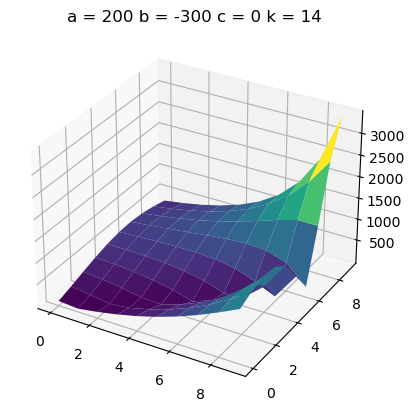

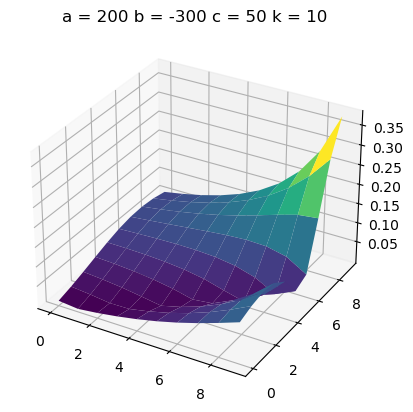

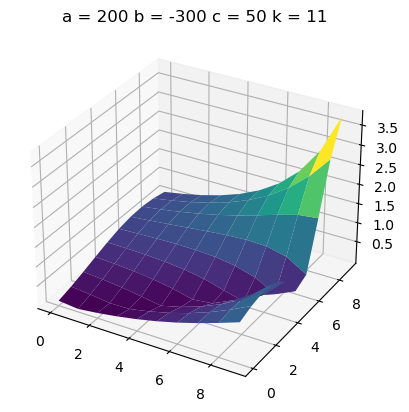

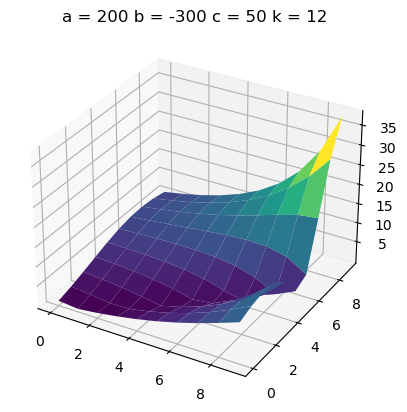

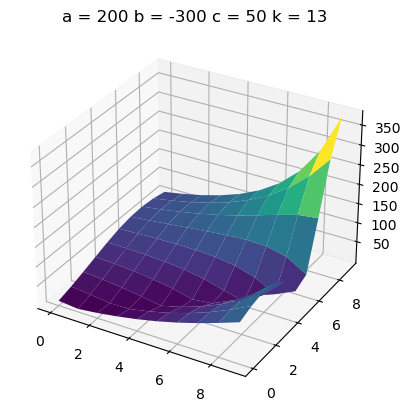

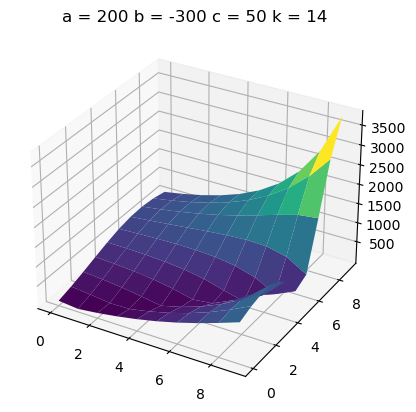

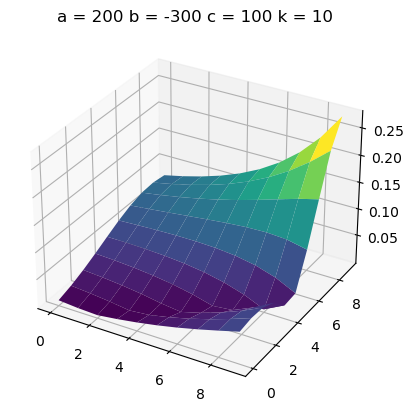

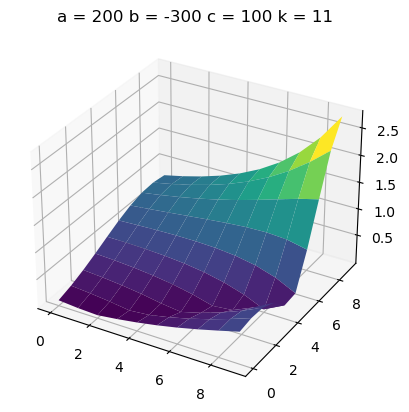

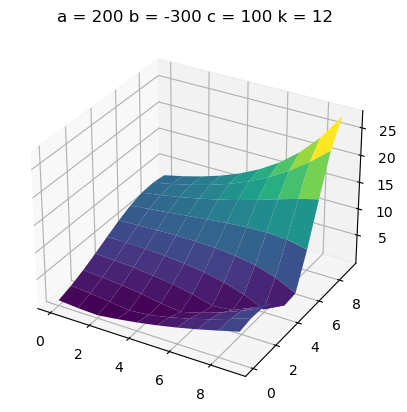

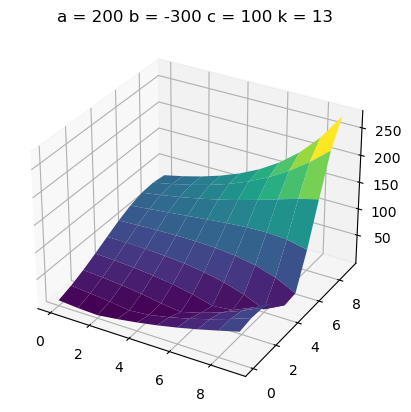

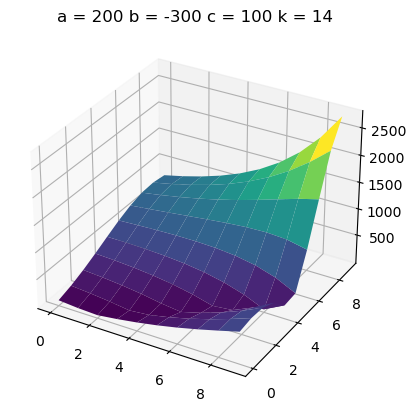

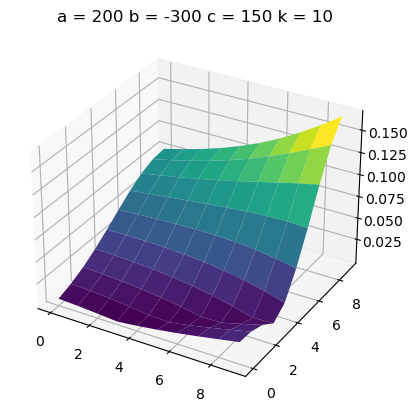

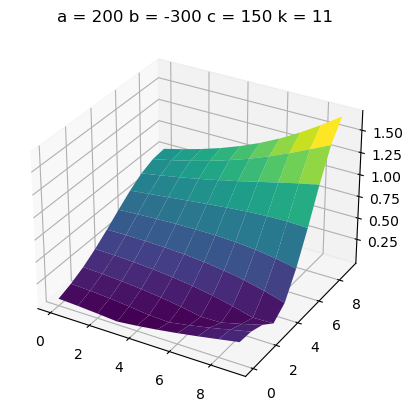

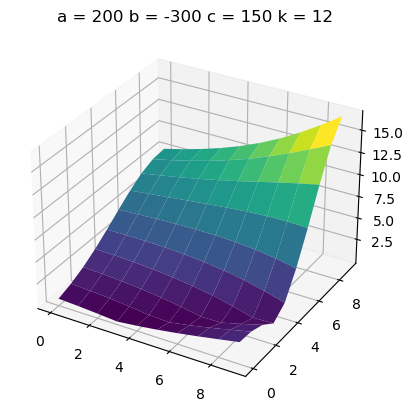

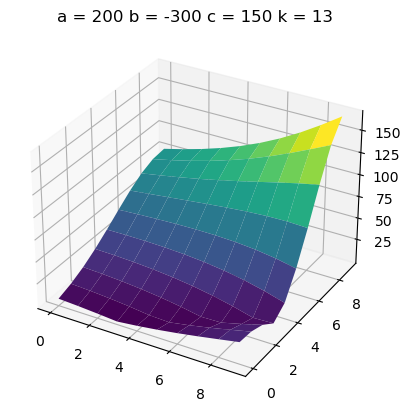

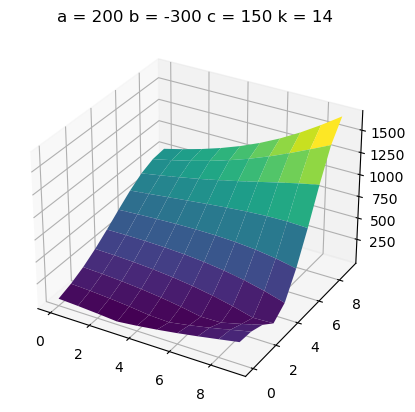

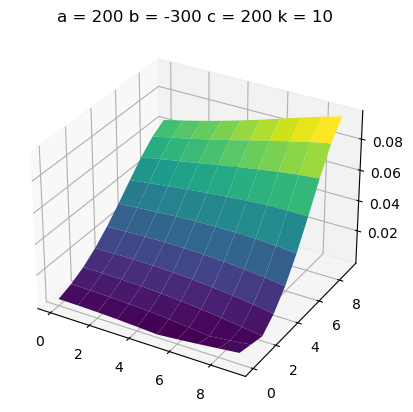

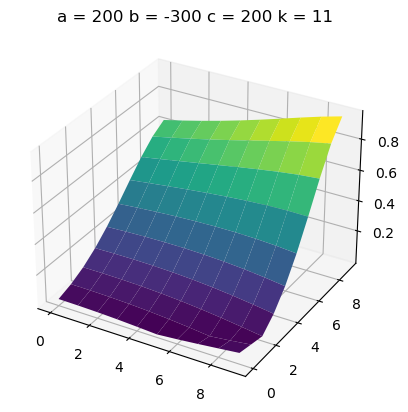

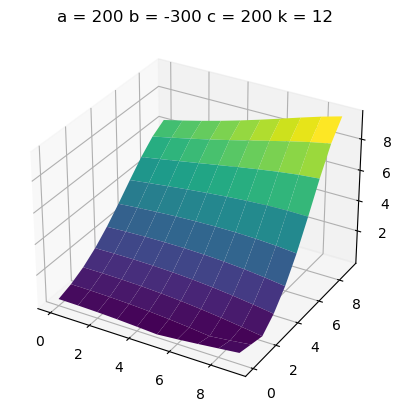

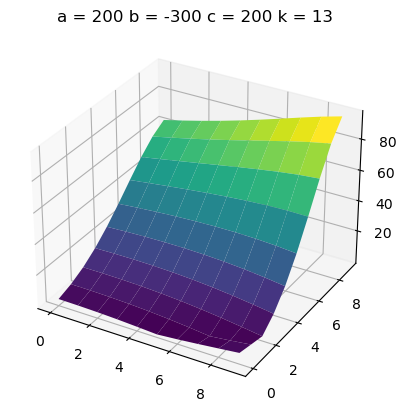

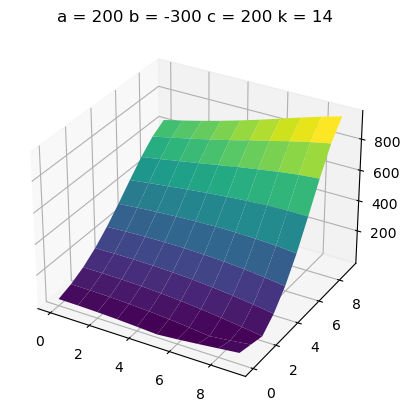

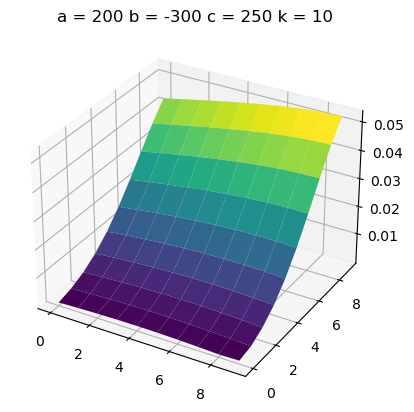

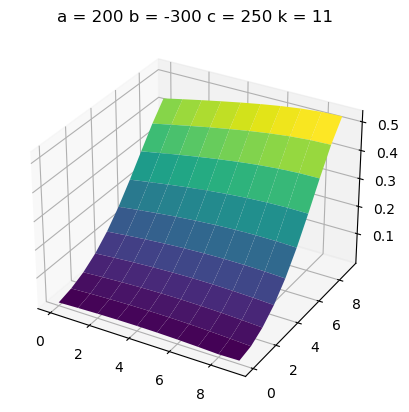

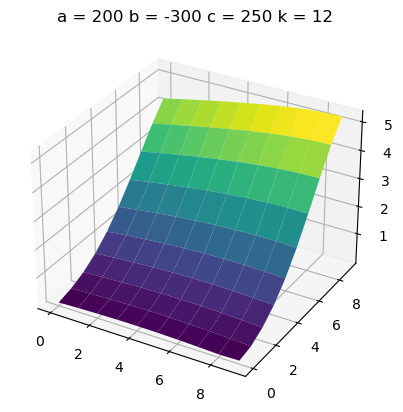

KeyboardInterrupt: 

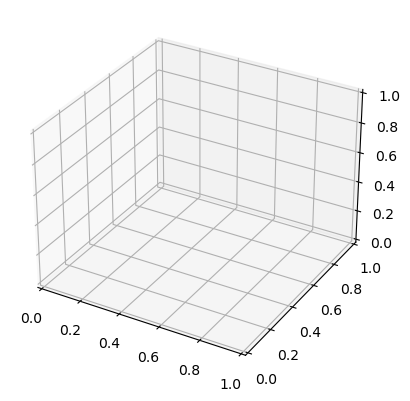

In [22]:


popt = [300, -120, 20,300, -120, 20,14]
a_list = np.arange(200,500,50)
b_list = np.arange(-300,-20,50)
c_list = np.arange(0,300,50)
k_list = np.arange(10,15,1)
mse_val = []

for a in a_list:
    for b in b_list:
        for c in c_list:
            for k in k_list:
                fig = plt.figure()
                ax = plt.axes(projection='3d')
                x = np.arange(0,10,1)
                y = np.arange(0,10,1)
                X, Y = np.meshgrid(x, y)
                Z  = np.zeros((10, 10))
                for xi in x:
                    for yi in y:
                        input = (xi,yi)
                        Z[xi][yi] = get_signal_strength(input,a,b,c,a,b,c,k)
                #mse_val.append((a,b,c,k,np.mean((Z-matrix)**2)))
                #print(mse_val[-1])
                ax.plot_surface(Y, X, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
                #ax.set_xlabel('x')
                #ax.set_ylabel('y')
                #ax.set_zlabel('RSSI');
                plt.title(f"a = {a} b = {b} c = {c} k = {k}")
                plt.show()
                # plt.clf()
                # plt.pause(1)
                # plt.close(fig)

In [23]:
print(mse_val[0])
mse_val = np.array(mse_val)
np.argmin(mse_val[:,4])
print(mse_val[219])

[ 2.00000000e+02 -3.00000000e+02  0.00000000e+00  1.00000000e+01
  1.12514642e+06]
[ 2.50000000e+02 -2.50000000e+02  5.00000000e+01  1.40000000e+01
  4.97683221e+05]


Base values 200,-100, 0, 200,-100, 0,12

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(6, 0)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(7, 0)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(8, 0)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(8, 10)
(9, 0)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)
(9, 10)
(10, 0)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)


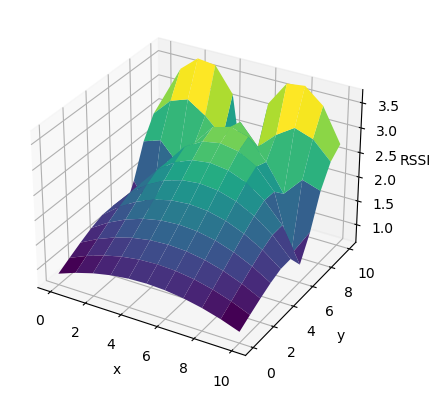

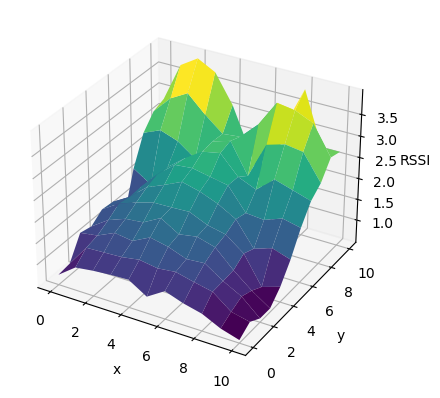

In [65]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.arange(0,11,1)
y = np.arange(0,11,1)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((11, 11))
for xi in x:
    for yi in y:
        input = (xi,yi)
        Z[xi][yi] = np.log10(get_signal_strength(input,180,-30, -17, 180,-120, -17, 10.2))
ax.plot_surface(Y,X, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('RSSI');
plt.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.arange(0,11,1)
y = np.arange(0,11,1)
X, Y = np.meshgrid(x, y)
Z = np.log10(matrix)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('RSSI');
plt.pause(1)
plt.close(fig)



In [11]:
matrix.shape
X_data = []
Y_data = []
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        X_data.append((i,j))
        Y_data.append(matrix[i][j])
X_data = np.array(X_data)
Y_data = np.array(Y_data)

In [36]:
import pymc3 as pm

print(f"Running on PyMC3 v{pm.__version__}")
basic_model = pm.Model()
with basic_model:

    # Priors for unknown model parameters
    c1 = pm.Uniform("c1", lower=200,upper=280)
    c2 = pm.Uniform("c2", lower=-150, upper=-50)
    c3 = pm.Uniform("c3", lower=0, upper=50)
    k = pm.Uniform("k", lower=10, upper=15)
    #sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mray = []
    for value in X_data:
        mray.append(get_signal_strength(value,c1,c2,c3,c1,c2,c3,k))

    mu = mray

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=1, observed=Y_data)

Running on PyMC3 v3.11.2
(0, 0)


MagpylibBadUserInput: No observers provided
Observers must be either
- array_like positions of shape (N1, N2, ..., 3)
- Sensor object
- Collection with at least one Sensor
- 1D list of the above
received Elemwise{add,no_inplace}.0 of type 'TensorVariable' instead.